<a href="https://colab.research.google.com/github/Victor094/edsaprojrecsort/blob/master/Hackathon_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving training.csv to training (1).csv


In [0]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, roc_auc_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [0]:
train = pd.read_csv('training.csv')
test = pd.read_csv('test.csv')

In [0]:
test1 = test[['TransactionId']]

In [42]:
test1.head()

,TransactionId
0,TransactionId_50600
1,TransactionId_95109
2,TransactionId_47357
3,TransactionId_28185
4,TransactionId_22140


###  Checking if the class in balanced

In [43]:
train['FraudResult'].value_counts()

0    95469
1      193
Name: FraudResult, dtype: int64

### Visualize the class

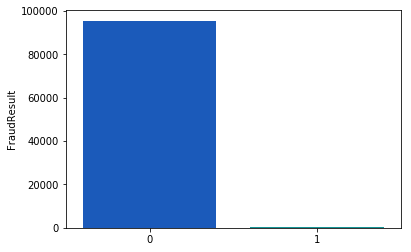

In [44]:
sns.barplot(train['FraudResult'].value_counts().index,train['FraudResult'].value_counts(),palette='winter')

### Resample the data

In [0]:
# from sklearn.utils import resample
# # Majority Variable
# train_moj = train[train['FraudResult'] == 0]
# # Minority variable 
# train_min = train[train['FraudResult'] == 1]

# train_min_sampled = resample(train_min , replace = True, n_samples = len(train_moj), random_state = 123)

# train_concat = pd.concat([train_min_sampled,train_moj])

In [0]:
# sns.barplot(train_concat['FraudResult'].value_counts().index,train_concat['FraudResult'].value_counts(),palette='winter')

In [47]:
train_missing_values = train.isnull().sum() / len(train) * 100
train_missing_values  = round(train_missing_values[train_missing_values > 0],2)
train_missing_values.sort_values(ascending = False, inplace = True)
pd.DataFrame(train_missing_values,columns = ['Missing'])

,Missing


No missing values

In [0]:
from sklearn.preprocessing import LabelEncoder
# Train
cat = train.select_dtypes(include = object)
# Test
num = test.select_dtypes(include = object)
# Creating list of columns
cat_col = list(cat)
num_col = list(num)

# Categorical
for col in cat_col:
    label = LabelEncoder()
    label.fit(list(train[col].values))
    train[col] = label.transform(list(train[col].values))

# Numerical
for col in num_col:
    label = LabelEncoder()
    label.fit(list(test[col].values))
    test[col] = label.transform(list(test[col].values))  

In [49]:
test.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy
0,27503,21131,784,1941,1143,0,256,4,19,0,2,1000.0,1000,0,4
1,43295,24825,1346,932,1756,0,256,4,5,2,2,2000.0,2000,1,2
2,26351,35635,2179,1611,1143,0,256,3,22,2,1,-50.0,50,2,2
3,19533,3718,924,2055,1306,0,256,4,1,0,2,3000.0,3000,3,4
4,17346,19131,2179,1611,1306,0,256,3,22,2,1,-60.0,60,4,2


In [0]:
y = train['FraudResult']
X = train.drop(columns='FraudResult')

In [51]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

# Instatiate LogisticRegression and RandomForestClassifiers objects
lg = LogisticRegression()
rf = RandomForestClassifier()

# Fitting the model
lg.fit(X_train,y_train)
rf.fit(X_train,y_train)

#Predict from training.csv
y_pred_lg = lg.predict(X_test)
y_pred_rf = rf.predict(X_test)


# Evaluating Model Performance
print('Logist :',accuracy_score(y_test,y_pred_lg))
print('Ramdom :',accuracy_score(y_test,y_pred_rf))

print('Rou : ', roc_auc_score(y_test,y_pred_lg))
print('Rou : ', roc_auc_score(y_test,y_pred_rf))

print('.......................CLASSIFICATION REPORT.....................')

print('Logistic Classifiction Report:', classification_report(y_test,y_pred_lg))
print('Random Forest Report:', classification_report(y_test,y_pred_rf))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Logist : 0.9983797627136362
Ramdom : 0.9996341399675952
Rou :  0.6427000583456756
Rou :  0.9712976676690154
.......................CLASSIFICATION REPORT.....................
Logistic Classifiction Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19098
           1       0.62      0.29      0.39        35

    accuracy                           1.00     19133
   macro avg       0.81      0.64      0.70     19133
weighted avg       1.00      1.00      1.00     19133

Random Forest Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19098
           1       0.87      0.94      0.90        35

    accuracy                           1.00     19133
   macro avg       0.93      0.97      0.95     19133
weighted avg       1.00      1.00      1.00     19133



In [0]:
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)


# plt.plot(fpr, tpr, marker='.')

In [0]:
df  = pd.DataFrame({'TransactionId': test1['TransactionId'], 'FraudResult': rf.predict(test)})

In [0]:
df.to_csv('out_csv.csv',index = False)

95662

In [0]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')